In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("C:/Users/navji/Downloads/Projects/titanic.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [4]:
dummies = pd.get_dummies(df[['Embarked', 'Sex', 'Pclass']])
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['Embarked'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,3,0,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,3,0,0,1,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,2,0,1,0,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,3,0,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,3,0,0,1,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,1,1,0,0,1,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,3,0,0,1,0,1
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,3,0,0,1,0,1


In [5]:
df = df.drop(columns=['Cabin', 'Name', 'Sex', 'PassengerId', 'Ticket'], axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,34.50000,0,0,7.8292,3,0,1,0,0,1
1,1,3,47.00000,1,0,7.0000,3,0,0,1,1,0
2,0,2,62.00000,0,0,9.6875,2,0,1,0,0,1
3,0,3,27.00000,0,0,8.6625,3,0,0,1,0,1
4,1,3,22.00000,1,1,12.2875,3,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,30.27259,0,0,8.0500,3,0,0,1,0,1
414,1,1,39.00000,0,0,108.9000,1,1,0,0,1,0
415,0,3,38.50000,0,0,7.2500,3,0,0,1,0,1
416,0,3,30.27259,0,0,8.0500,3,0,0,1,0,1


In [6]:
#df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
#merged_df = pd.merge(df1, df2, on='id', how='inner')


In [7]:
x = df.drop(columns=['Survived'], axis =1)
y = df['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
train = x_train.join(y_train)
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 199 to 71
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      334 non-null    int64  
 1   Age         334 non-null    float64
 2   SibSp       334 non-null    int64  
 3   Parch       334 non-null    int64  
 4   Fare        334 non-null    float64
 5   Pclass      334 non-null    int32  
 6   Embarked_C  334 non-null    int32  
 7   Embarked_Q  334 non-null    int32  
 8   Embarked_S  334 non-null    int32  
 9   Sex_female  334 non-null    int32  
 10  Sex_male    334 non-null    int32  
 11  Survived    334 non-null    int64  
dtypes: float64(2), int32(6), int64(4)
memory usage: 34.2 KB


In [10]:
na1 = df.isna().sum()
na1

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass        0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train.drop(['Survived'], axis=1), train['Survived']
x_train_s = scaler.fit_transform(x_train)

model = LogisticRegression(solver='lbfgs', penalty='l2', C=1.0)
model.fit(x_train, y_train)
#optimization for logistic regression that inherently comes with ridge regression (L2)
#lbfgs lowers the cost function 



LogisticRegression()

In [12]:
test = x_test.join(y_test)

In [14]:
x_test, y_test = test.drop(['Survived'], axis =1), test['Survived']
x_test_s = scaler.transform(x_test)

In [15]:
model.score(x_test, y_test)

1.0

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  0]
 [ 0 32]]


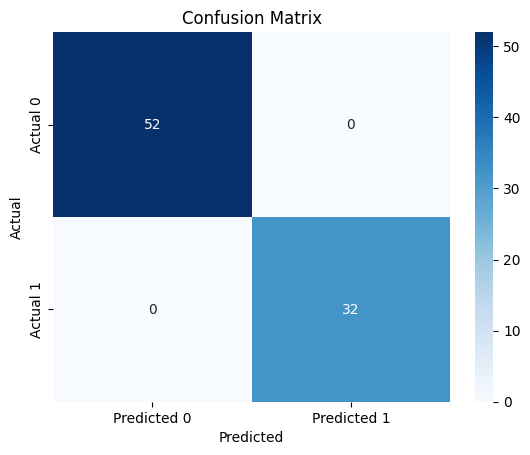

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("recall: ", recall)
print("precision: ", precision)
print("auroc: ", auroc)



Accuracy:  1.0
recall:  1.0
precision:  1.0
auroc:  1.0


In [23]:
coefficients = model.coef_
for i, coef in enumerate(coefficients[0]):  # Assuming coefficients is a 2D array for logistic regression
    print(f"Coefficient for feature {i}: {coef:.4f}")

Coefficient for feature 0: -0.0396
Coefficient for feature 1: -0.0071
Coefficient for feature 2: 0.0774
Coefficient for feature 3: 0.1556
Coefficient for feature 4: 0.0031
Coefficient for feature 5: -0.0396
Coefficient for feature 6: -0.1083
Coefficient for feature 7: 0.2719
Coefficient for feature 8: -0.1653
Coefficient for feature 9: 3.6843
Coefficient for feature 10: -3.6860
